In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# show more colums
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [2]:
df = pd.read_csv("../data/LGA_Flights_Departure.csv")
df.head(10)

,FlightDate,DepDelay,Distance,CRSDepTime,CRSElapsedTime,CRSArrTime,DayOfWeek,Year,Month,AverageDelayPerFlightNumber,AverageDelayPerDistanceGroup,AverageDelayPerAircraft,Dest_ALB,Dest_ATL,Dest_BNA,Dest_BOS,Dest_BUF,Dest_BZN,Dest_CHS,Dest_CLT,Dest_CMH,Dest_CVG,Dest_DCA,Dest_DEN,Dest_DFW,Dest_DTW,Dest_FLL,Dest_GSP,Dest_IAH,Dest_JAX,Dest_MCO,Dest_MHT,Dest_MIA,Dest_MSN,Dest_MSP,Dest_MSY,Dest_MYR,Dest_OMA,Dest_ORD,Dest_ORF,Dest_PBI,Dest_PWM,Dest_RDU,Dest_RIC,Dest_RSW,Dest_SDF,Dest_SRQ,Dest_STL,Dest_TPA,Dest_TVC
0,2018-01-01,-2.0,762.0,479.0,115.0,634,1,2018,1,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-01-01,-1.0,1096.0,425.0,123.0,628,1,2018,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-01-01,-9.0,1080.0,845.0,127.0,1052,1,2018,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2018-01-01,6.0,762.0,360.0,120.0,520,1,2018,1,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-01-01,-3.0,1096.0,545.0,129.0,754,1,2018,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2018-01-01,0.0,950.0,925.0,149.0,1114,1,2018,1,0.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2018-01-01,-6.0,950.0,486.0,147.0,673,1,2018,1,0.0,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2018-01-01,-2.0,762.0,1020.0,129.0,1189,1,2018,1,0.0,1.5,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2018-01-01,28.0,1096.0,615.0,132.0,827,1,2018,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2018-01-01,11.0,1076.0,710.0,159.0,909,1,2018,1,0.0,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='CRSDepTime', ylabel='Density'>

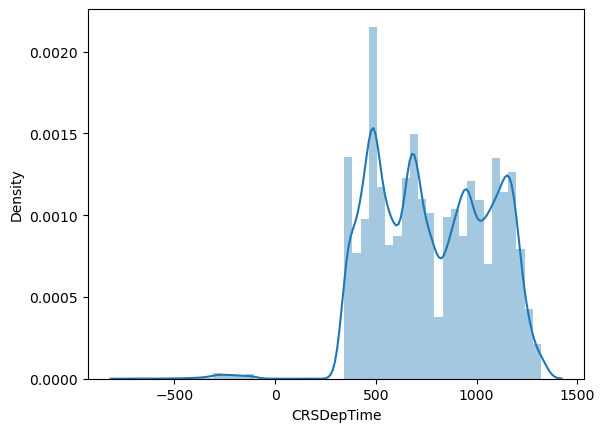

In [3]:
# plot CRSArrTime
sns.distplot(df['CRSDepTime'])

In [4]:
df_train = df[df["FlightDate"] < "2019-10-01"]
df_test = df[df["FlightDate"] >= "2019-10-01"]

# drop FlightDate
df_train = df_train.drop("FlightDate", axis=1)
df_test = df_test.drop("FlightDate", axis=1)

# drop CRSDepTime
# df_train = df_train.drop("CRSDepTime", axis=1)
# df_test = df_test.drop("CRSDepTime", axis=1)

# Get the arrays
X_train, y_train = df_train.drop("DepDelay", axis=1), df_train["DepDelay"]
X_test, y_test = df_test.drop("DepDelay", axis=1), df_test["DepDelay"]

# BASELINE

In [5]:
y_pred = np.full(len(y_test), y_train.mean())
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Root Mean squared error: 42.99
Mean absolute error: 23.68


# Linear Regression

In [7]:
# keep the first 10 columns of X_train
X_train_reg = X_train.iloc[:, :10]
X_test_reg = X_test.iloc[:, :10]

In [8]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train_reg, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_reg)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Root Mean squared error: 38.32
Mean absolute error: 22.70
Coefficient of determination: 0.19


# Random Forest

In [34]:
rfc=RandomForestRegressor(random_state=1601)

param_grid = { 
    'n_estimators': range(100, 500, 150),
    'max_features': ['auto', 'sqrt'],
    'max_depth': range (5, 8, 2),
    'criterion' :["squared_error", "absolute_error"]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose=2)
CV_rfc.fit(X_train_reg, y_train)

# # Create a random forest
# rf = RandomForestRegressor(n_estimators=100, random_state=1601)

# # Train the model using the training sets
# rf.fit(X_train_reg, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100; total time=   3.2s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100; total time=   3.1s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100; total time=   3.2s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100; total time=   3.2s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100; total time=   3.3s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=250; total time=   8.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=250; total time=   8.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=250; total time=   7.9s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=250; total time=   8.0s
[CV] END cr

Root Mean Squared Error: 38.42
Mean absolute error: 24.29
Coefficient of determination: 0.19


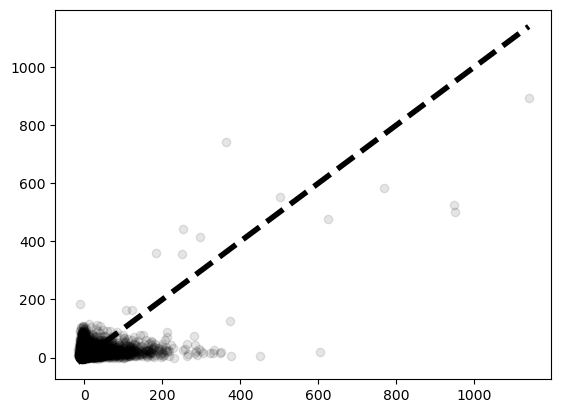

In [21]:
rf = CV_rfc

# Make predictions using the testing set
y_pred = rf.predict(X_test_reg)

# The mean squared error
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, color="black", alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)

<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

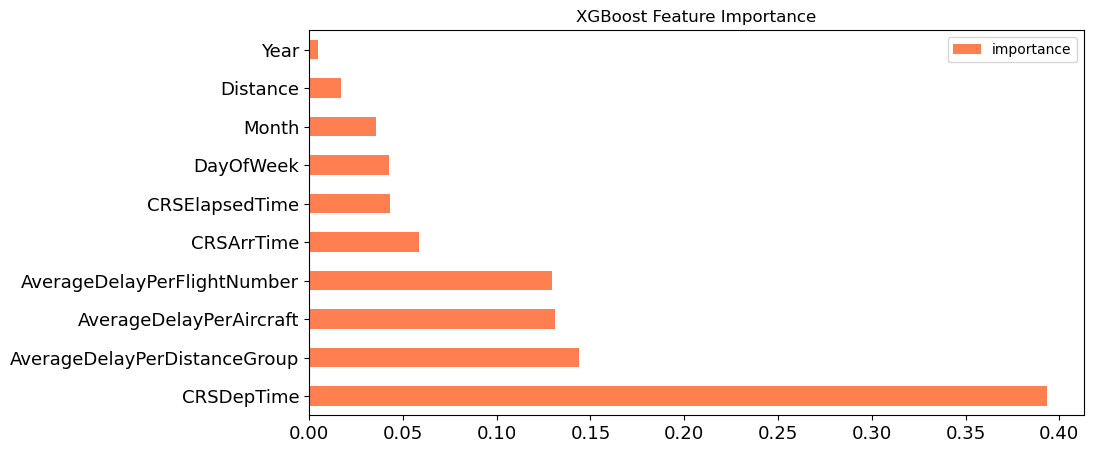

In [22]:
## feature importance
feature_importance = pd.DataFrame(
    rf.feature_importances_, index=X_train_reg.columns, columns=["importance"]
).sort_values("importance", ascending=False)

# get the 50 most important features
feature_importance = feature_importance.iloc[:15]

feature_importance.plot(
    kind="barh",
    figsize=(10, 5),
    color="coral",
    fontsize=13,
    title="XGBoost Feature Importance",
)

# XGBoost

In [27]:
estimator = XGBRegressor(
    enable_categorical = True,
    objective = "reg:linear",
    #use_label_encoder = True,
    #nthread=8,
    #n_jobs = 10,
    seed=1601
)

parameters = {
    'max_depth': range (4, 8, 2),
    'n_estimators': range(100, 500, 150),
}

CV_xgb = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose=2)
CV_xgb.fit(X_train_reg, y_train)

# # XGBoost Regressor
# xgb = XGBRegressor(n_estimators=500, random_state=1601)

# # Train the model using the training sets
# xgb.fit(X_train_reg, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=1601,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Root Mean squared error: 44.47
Mean absolute error: 28.69
Coefficient of determination: -0.09


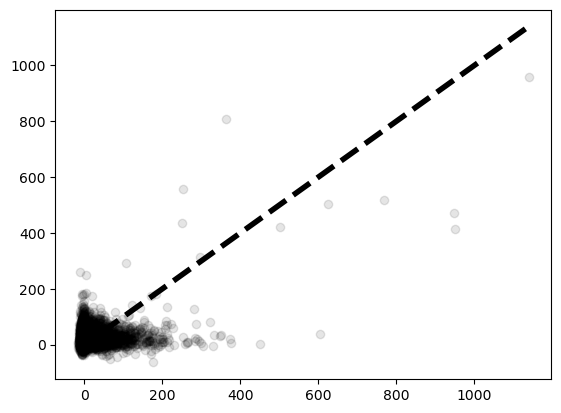

In [30]:
xgb = CV_xgb

# Make predictions using the testing set
y_pred = xgb.predict(X_test_reg)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, color="black", alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)

<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

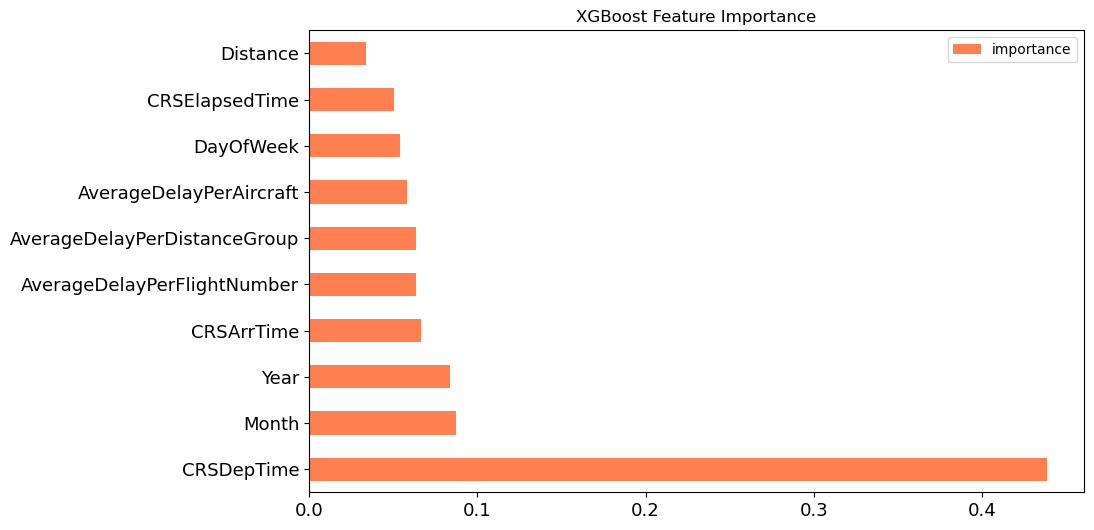

In [29]:
## feature importance
feature_importance = pd.DataFrame(
    xgb.feature_importances_, index=X_train_reg.columns, columns=["importance"]
).sort_values("importance", ascending=False)

# get the 50 most important features
feature_importance = feature_importance.iloc[:10]

feature_importance.plot(
    kind="barh",
    figsize=(10, 6),
    color="coral",
    fontsize=13,
    title="XGBoost Feature Importance",
)